참조 : https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
# 경고창무시
import warnings
warnings.filterwarnings('ignore') 

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O']) # include = 'object'

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fox, Mr. Stanley Hubert",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


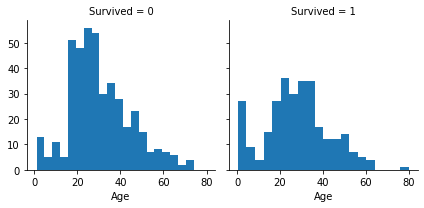

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

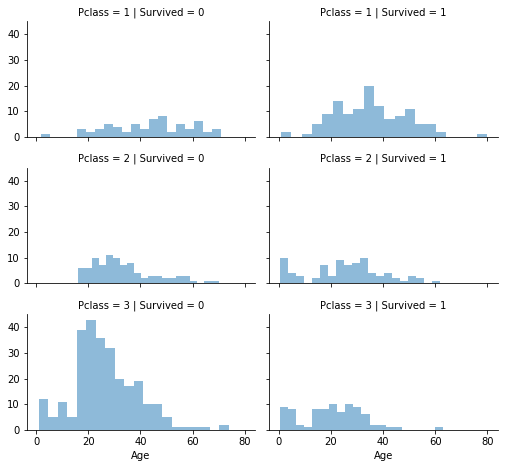

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

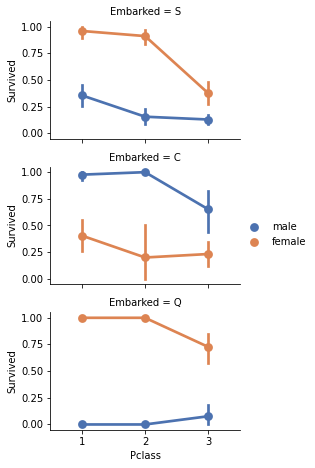

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

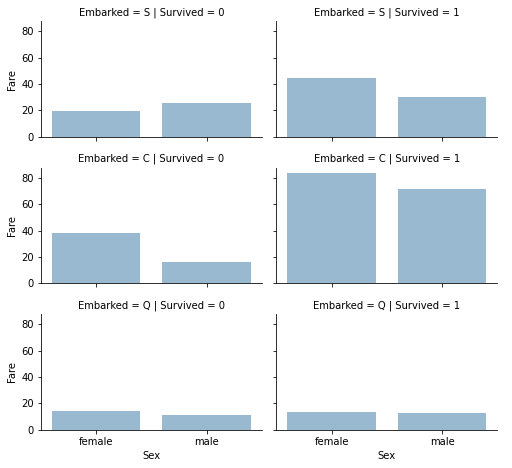

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [18]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [23]:
train_df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Rare      45.545455
Name: Age, dtype: float64

In [24]:
for data in combine:
  data.loc[(data.Age.isnull())&(data.Title=='Mr'),'Age']=33
  data.loc[(data.Age.isnull())&(data.Title=='Mrs'),'Age']=36
  data.loc[(data.Age.isnull())&(data.Title=='Master'),'Age']=5
  data.loc[(data.Age.isnull())&(data.Title=='Miss'),'Age']=22
  data.loc[(data.Age.isnull())&(data.Title=='Rare'),'Age']=46

In [25]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64
________________________________________
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [27]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


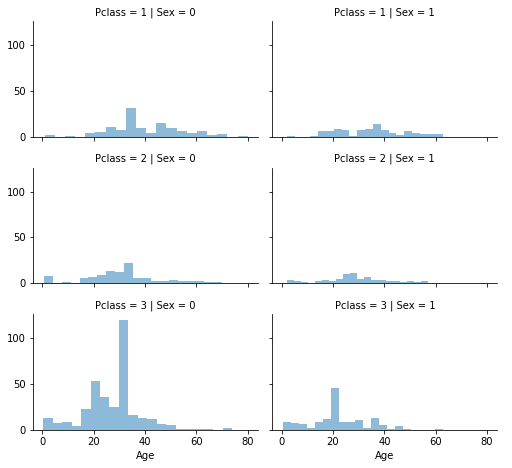

In [29]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [30]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64
________________________________________
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64


In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.392670
2,"(32.252, 48.168]",0.320000
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [32]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]"


In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [34]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [36]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


In [37]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Title         0
FamilySize    0
IsAlone       0
dtype: int64
________________________________________
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,0,1,2,0
1,1,1,1,2,71.2833,1,3,2,0
2,1,3,1,1,7.9250,0,2,1,1
3,1,1,1,2,53.1000,0,3,2,0
4,0,3,0,2,8.0500,0,1,1,1


In [41]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,7.8292,2,1,1,1
1,893,3,1,2,7.0000,0,3,2,0
2,894,2,0,3,9.6875,2,1,1,1
3,895,3,0,1,8.6625,0,1,1,1
4,896,3,1,1,12.2875,0,3,3,0


In [42]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64
________________________________________
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


In [43]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,0,0,1,2,0
1,1,1,1,2,3,1,3,2,0
2,1,3,1,1,1,0,2,1,1
3,1,1,1,2,3,0,3,2,0
4,0,3,0,2,1,0,1,1,1
5,0,3,0,2,1,2,1,1,1
6,0,1,0,3,3,0,1,1,1
7,0,3,0,0,2,0,4,5,0
8,1,3,1,1,1,0,3,3,0
9,1,2,1,0,2,1,3,2,0


In [45]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,2,1,1,1
1,893,3,1,2,0,0,3,2,0
2,894,2,0,3,1,2,1,1,1
3,895,3,0,1,1,0,1,1,1
4,896,3,1,1,1,0,3,3,0


In [46]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

[     PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone
0            892       3    0    2     0         2      1           1        1
1            893       3    1    2     0         0      3           2        0
2            894       2    0    3     1         2      1           1        1
3            895       3    0    1     1         0      1           1        1
4            896       3    1    1     1         0      3           3        0
..           ...     ...  ...  ...   ...       ...    ...         ...      ...
413         1305       3    0    2     1         0      1           1        1
414         1306       1    1    2     3         1      5           1        1
415         1307       3    0    2     0         0      1           1        1
416         1308       3    0    2     1         0      1           1        1
417         1309       3    0    0     2         1      4           3        0

[418 rows x 9 columns]]


In [135]:
train_X = train_df.drop("Survived", axis=1)
train_Y = train_df["Survived"]
test_X  = test_df.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 8), (891,), (418, 8))

In [63]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report

In [136]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.158062
5,Title,0.464370
4,Embarked,0.262617
3,Fare,0.211079
2,Age,-0.035639
6,FamilySize,-0.394009
7,IsAlone,-0.493238
0,Pclass,-0.706636


In [137]:
# Radial Support Vector Machines(rbf-SVM)
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
acc_rbf_svm = round(model.score(train_X, train_Y) * 100, 2)
acc_rbf_svm

83.73

In [138]:
# Linear Support Vector Machines(linear-SVM)

model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
acc_lin_svm = round(model.score(train_X, train_Y) * 100, 2)
acc_lin_svm

81.26

In [139]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
acc_lr = round(model.score(train_X, train_Y) * 100, 2)
acc_lr

80.47

In [140]:
# Decision Tree

model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
acc_dt = round(model.score(train_X, train_Y) * 100, 2)
acc_dt

89.0

In [141]:
# K-Nearest Neighbours(KNN)

model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
acc_knn = round(model.score(train_X, train_Y) * 100, 2)
acc_knn

80.58

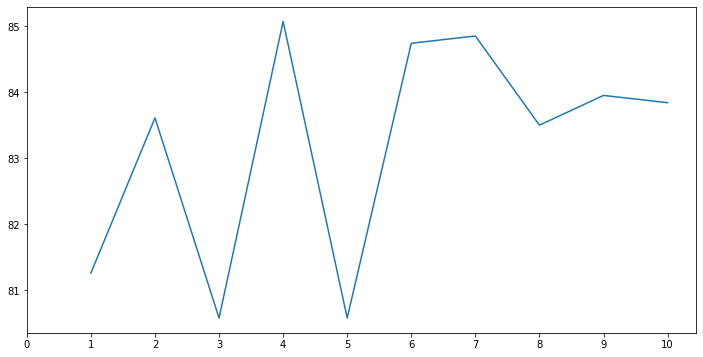

Accuracies for different values of n are: [81.26 83.61 80.58 85.07 80.58 84.74 84.85 83.5  83.95 83.84] with the max value as  85.07


In [142]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    acc_knn = round(model.score(train_X, train_Y) * 100, 2)
    a=a.append(pd.Series(acc_knn))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [143]:
# Gaussian Naive Bayes

model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
acc_GNB = round(model.score(train_X, train_Y) * 100, 2)
acc_GNB

78.56

In [144]:
# Random Forests

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
acc_RF = round(model.score(train_X, train_Y) * 100, 2)
acc_RF

89.0

In [61]:
# # Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# Y_pred2 = decision_tree.predict(X_test)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
# acc_decision_tree

89.0

In [57]:
# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

89.0

In [145]:
from sklearn.model_selection import KFold # K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score # 점수 평가
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits = 10, random_state = 22) # k = 10 , 데이터셋을  동일 크기의 10개의 서브셋으로 나눕니다.
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), 
                 KNeighborsClassifier(n_neighbors=4), DecisionTreeClassifier(), GaussianNB(),
                 RandomForestClassifier(n_estimators=100)]
for i in models :
    model = i 
    cv_result = cross_val_score(model, train_X, train_Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result 
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2.sort_values(by = 'CV Mean', ascending=False)

,CV Mean,Std
Radial Svm,0.822672,0.033625
Random Forest,0.820449,0.040704
Decision Tree,0.809226,0.028689
Logistic Regression,0.801361,0.028334
KNN,0.799164,0.039302
Linear Svm,0.787853,0.034385
Naive Bayes,0.778901,0.036584


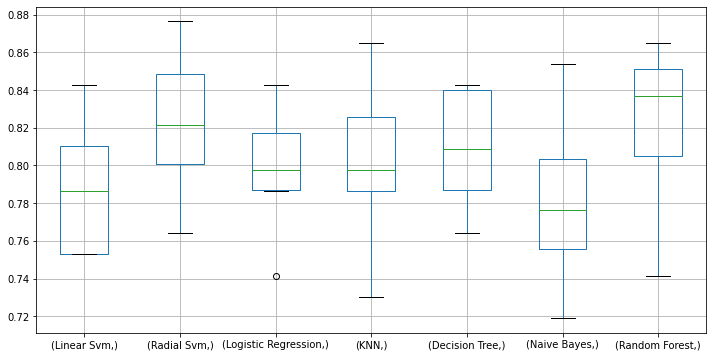

In [146]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

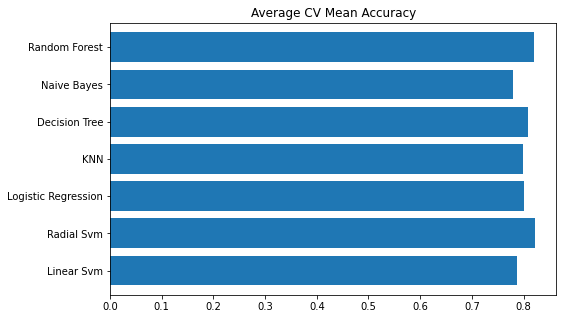

In [147]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()


In [148]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(train_X,train_Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8305002824681438
SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   20.6s finished


In [109]:
n_estimators = range(100, 1000, 100)
hyper = { 'n_estimators' : n_estimators }
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose = True)
gd.fit(train_X,train_Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   39.9s finished


0.82045069361622
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, train_X, train_Y, cv=10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8260549313358302


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate = 0.1)
result = cross_val_score(grad, train_X, train_Y, cv=10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8159425717852684


In [113]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1)
result = cross_val_score(xgboost, train_X, train_Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8159550561797753


In [114]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(train_X,train_Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8249199673592367
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.3,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 10.2min finished


In [149]:
Y_hat = gd.predict(test_X)
print(Y_hat)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [150]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_hat
    })
submission.to_csv('./submission4.csv', index=False)

In [151]:
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
